# Analysis Notebook
This notebook is used to analyze the trained model and the dataset. It is used to visualize the dataset and the model's performance.

In [1]:
import json
import timm
from fastai.imports import *
from fastai.vision.all import *
from data import get_dls_from_images


d:\Anaconda\envs\Thesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open("../config.json", "r") as config_file:
    config = json.load(config_file)
    
metrics_dict = {
            "f1_score": F1Score(),
            "precision": Precision(),
            "recall": Recall(),
            "accuracy": accuracy,
        }

In [3]:
def load_saved(timm_model_name: str, model_save: str = "output"):
    """
    Loads a saved model from disk.

    Parameters
    ----------
    model_name : str
        The name of the model to load, excluding `.pth`.

    Returns
    -------
    Timm model
        The loaded model.
    """
    model = timm.create_model(
        model_name=timm_model_name,
        checkpoint_path=model_save,
        num_classes=2,
    )
    model.eval()
    return model
model = load_saved("efficientnet_b0", "../output/efficientnet_b0-0.8877.pth")

In [4]:

# Load the data
config["data"]["image_dir"] = f"../{config['data']['image_dir']}"
train_dl, val_dl, test_dl = get_dls_from_images(config=config)
dls = DataLoaders(train_dl, val_dl)


In [23]:
# Load the saved learner
learn = Learner(dls, model)
learn.path = Path("..")
learn.load("efficientnet_b0-0.8877-learner")

# Assuming 'learn' is your Learner and 'test_dl' is your DataLoader for the test set
preds, targets = learn.get_preds(dl=test_dl)

In [24]:
# Convert predictions to actual class labels (assuming single-label classification)
predicted_labels = preds.argmax(dim=1)

# Find incorrect classifications
incorrects = predicted_labels != targets
incorrect_indices = torch.where(incorrects)[0]  # Get indices of incorrect predictions
incorrect_images = [test_dl.dataset.items[i] for i in incorrect_indices]
incorrect_preds = predicted_labels[incorrects]
actual_labels = targets[incorrects]

..\downloaded-data\crypto-charts\charts\3938.png
..\downloaded-data\crypto-charts\charts\2921.png
..\downloaded-data\fintwit-images\charts\6370.png
..\downloaded-data\stock-charts\charts\5238.jpeg
..\downloaded-data\stock-charts\charts\5241.jpeg


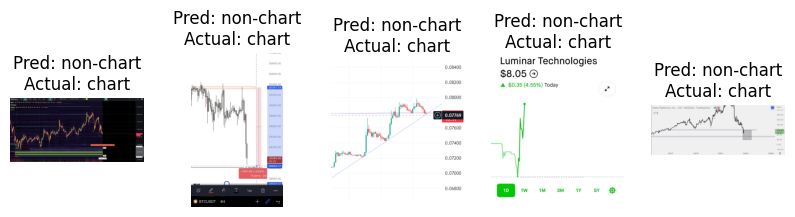

In [30]:
import matplotlib.pyplot as plt

# Label to text
label2text = {0: "chart", 1: "non-chart"}

def show_incorrect_images(incorrect_images, incorrect_preds, actual_labels, n_show=5):
    fig, axs = plt.subplots(1, n_show, figsize=(10, 2))
    for i, ax in enumerate(axs.flatten()):
        img = PILImage.create(incorrect_images[i])
        ax.imshow(img)
        print(incorrect_images[i])
        ax.set_title(f'Pred: {label2text[incorrect_preds[i].item()]}\nActual: {label2text[actual_labels[i].item()]}')
        ax.axis('off')
    plt.show()

show_incorrect_images(incorrect_images, incorrect_preds, actual_labels)
